In [1]:
%cd ..

/Users/ivallesp/projects/cfavorita


In [3]:
import pandas as pd
import numpy as np

/Users/ivallesp/.sandbox_env/.venv/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
df = pd.read_csv("data/train.csv")
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")
df["dayofyear"] = df.date.dt.dayofyear
df["year"] = df.date.dt.year

FileNotFoundError: [Errno 2] File data/train.csv does not exist: 'data/train.csv'

In [5]:
df["dayofweek"] = df.date.dt.dayofweek


In [6]:
df["week"] = df.date.dt.week


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [7]:
df_agg_product = df.groupby("item_nbr").unit_sales.sum()
df_agg_store = df.groupby("store_nbr").unit_sales.sum()


In [8]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

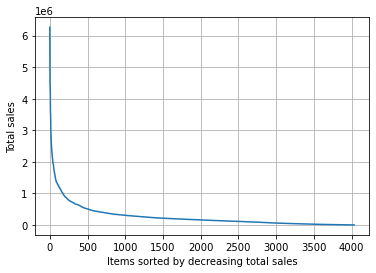

In [9]:
df_agg_product.sort_values(ascending=False).reset_index().unit_sales.plot(grid=True, 
                                                                          xlabel="Items sorted by decreasing total sales",
                                                                          ylabel="Total sales")
plt.savefig("items_tail.eps")

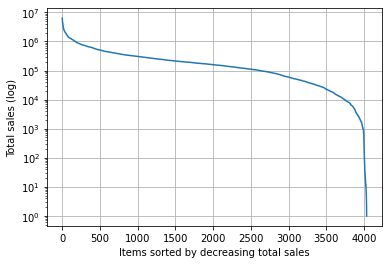

In [10]:
df_agg_product.sort_values(ascending=False).reset_index().unit_sales.plot(grid=True, 
                                                                          xlabel="Items sorted by decreasing total sales",
                                                                          ylabel="Total sales (log)",
                                                                          logy=True)
plt.savefig("items_tail_log.eps")

In [11]:
x = df_agg_product.sort_values(ascending=False).values

x[0:round(len(x)*0.1)].sum()/x.sum()

0.4420022268415848

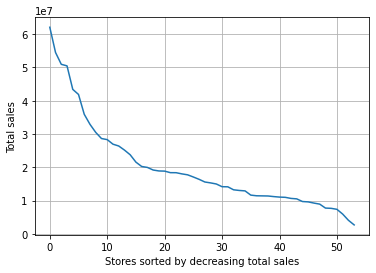

In [12]:
df_agg_store.sort_values(ascending=False).reset_index().unit_sales.plot(grid=True, 
                                                                          xlabel="Stores sorted by decreasing total sales",
                                                                          ylabel="Total sales")
plt.savefig("stores_tail.eps")

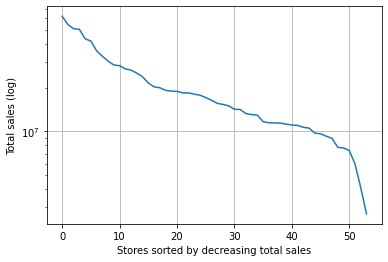

In [13]:
df_agg_store.sort_values(ascending=False).reset_index().unit_sales.plot(grid=True, 
                                                                          xlabel="Stores sorted by decreasing total sales",
                                                                          ylabel="Total sales (log)",
                                                                          logy=True)
plt.savefig("stores_tail_log.eps")

In [14]:
x = df_agg_store.sort_values(ascending=False).values

x[:10].sum()/x.sum()

0.4017480874788964

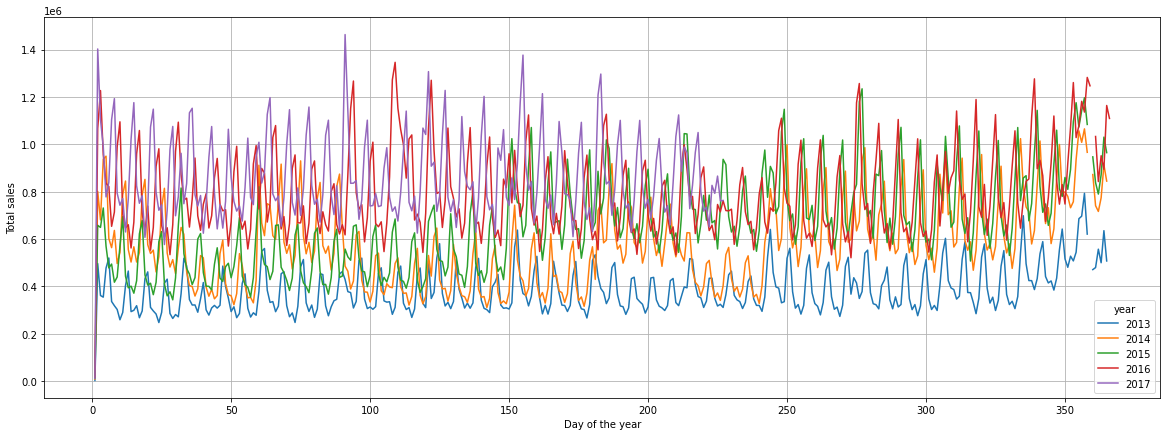

In [14]:
(df.groupby(["dayofyear", "year"]).unit_sales.sum()
 .reset_index().pivot(index="dayofyear", columns="year", values="unit_sales").plot(figsize=(20,7),
                grid=True, 
                xlabel="Day of the year",
                ylabel="Total sales"))

plt.savefig("timeseries.eps")

In [ ]:
xx = df.loc[lambda d:d.year==2016].groupby(["dayofweek", "week"]).unit_sales.sum()

In [ ]:
(df.loc[lambda d:d.year==2016].groupby(["dayofweek", "week"]).unit_sales.sum()
 .reset_index().pivot(index="dayofweek", columns="week", values="unit_sales").plot(figsize=(20,7),
                grid=True, 
                xlabel="Day of the week",
                ylabel="Total sales"))

plt.savefig("timeseries.eps")

In [15]:
1

1

In [ ]:
(df.groupby(["dayofyear", "year"]).unit_sales.sum()
 .reset_index().pivot(index="dayofyear", columns="year", values="unit_sales").plot(figsize=(20,4),
                grid=True, 
                xlabel="Day of the year",
                ylabel="Total sales"))

plt.savefig("timeseries.eps")

In [ ]:
df.head()

In [ ]:
days_with_sales = df.groupby(["store_nbr", "item_nbr"]).date.count()

In [ ]:
days_with_sales.plot.hist(bins=50)

In [ ]:
days_with_sales.value_counts().sort_values()

In [ ]:
days_with_sales